<a href="https://colab.research.google.com/github/kleintjesk/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**


**Author:** Kailin Kleintjes

## **Project Overview**

## **Load and Inspect Data**

In [100]:
#import pandas and sales prediction data
import pandas as pd
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)


In [101]:
#Inspect the data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## **Clean Data**

In [103]:
# How many rows and columns?
# What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
statement = f'There are 8523 rows and 12 columns. Datatypes for each variable can be found under the dtype listed above.'
print(statement)

There are 8523 rows and 12 columns. Datatypes for each variable can be found under the dtype listed above.


In [105]:
# Are there duplicates?
duplicated_rows = df.duplicated(keep = False)
duplicated_rows.sum()



0

In [106]:
statement = f'There are 0 duplicated rows.'
print(statement)

There are 0 duplicated rows.


In [107]:
#Identify missing values.

null_sums = df.isna().sum()
null_sums


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
statement = f'Item Weight has 1463 missing values and Outlet Size is missing 2410. All other categories are not missing values.'
print(statement)

Item Weight has 1463 missing values and Outlet Size is missing 2410. All other categories are not missing values.


In [109]:
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [110]:
statement = f' The percent of missing values in Item Weight is 17% and in Outlet Size it is 28%.'
print(statement)

 The percent of missing values in Item Weight is 17% and in Outlet Size it is 28%.


In [111]:
# Address the missing values by using a placeholder value.

obj_cols = df.select_dtypes('object').columns

categorical_placeholder = 'MISSING'
df['Outlet_Size'].fillna(value = categorical_placeholder, inplace = True)

df['Outlet_Size']

0        Medium
1        Medium
2        Medium
3       MISSING
4          High
         ...   
8518       High
8519    MISSING
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object

In [112]:
df['Outlet_Size'].isna().sum()

0

In [113]:
#df['Item_Weight']  = df['Item_Weight'].fillna(-1)
#df['Item_Weight'].isna().sum()

num_cols = df.select_dtypes('number').columns
df[num_cols] = df[num_cols].fillna(-1)

In [114]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
statement = f' Item Weight and Outlet Size now report 0 missing values.'
print(statement)

 Item Weight and Outlet Size now report 0 missing values.


In [116]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [117]:
# Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [118]:
statement = f' Value Counts for Item Fat Content indicates inconsistent naming for Low Fat items (Low Fat, LF, low fat).'
print(statement)

 Value Counts for Item Fat Content indicates inconsistent naming for Low Fat items (Low Fat, LF, low fat).


In [119]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [120]:
statement = f'All variations of low fat have been changed to Low Fat and the data is now consistent'
print(statement)

All variations of low fat have been changed to Low Fat and the data is now consistent


In [121]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [122]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**

Objective: The goal is to understand the properties of food products and outlets that play crucial roles in increasing sales.

In [123]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


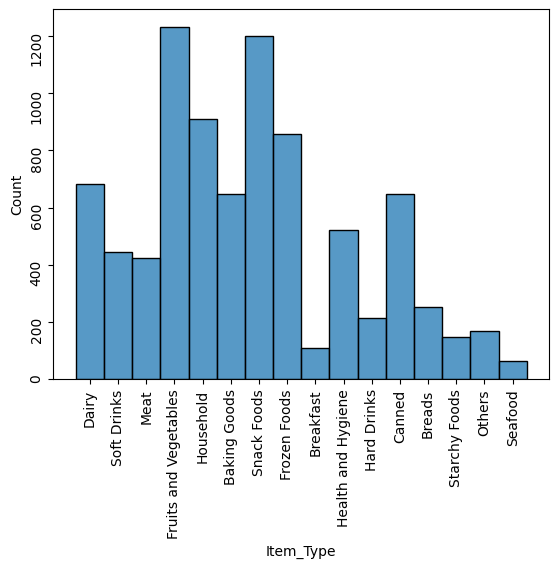

In [124]:
# Histograms to view the distributions of numerical features in your dataset.
ItemType = sns.histplot(data=df, x="Item_Type");
ItemType.tick_params(rotation = 90)

In [125]:
print(f'The types of items most commonly sold across outlets are "Fruits and Vegtables" and "Snack Foods". The least commonly sold item type is "Seafood".')

The types of items most commonly sold across outlets are "Fruits and Vegtables" and "Snack Foods". The least commonly sold item type is "Seafood".


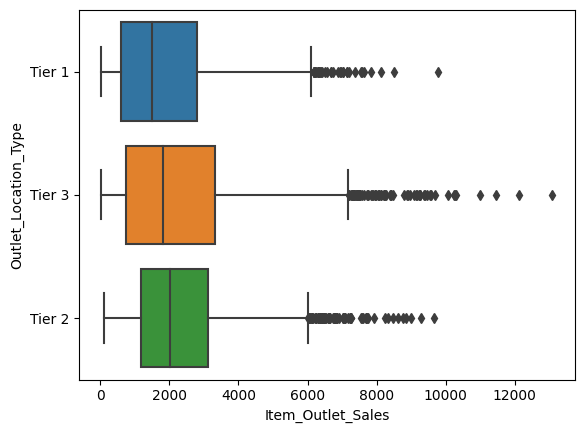

In [126]:
# Boxplots to view statistical summaries of numerical features in your dataset.

sns.boxplot(data=df, x="Item_Outlet_Sales", y="Outlet_Location_Type");

In [127]:
print(f'When comparing the three tiers of stores Tier 3 shows the greatest amount of item outlet sales per item. Why is Tier 3 showing more sales than the other tiers?')

When comparing the three tiers of stores Tier 3 shows the greatest amount of item outlet sales per item. Why is Tier 3 showing more sales than the other tiers?


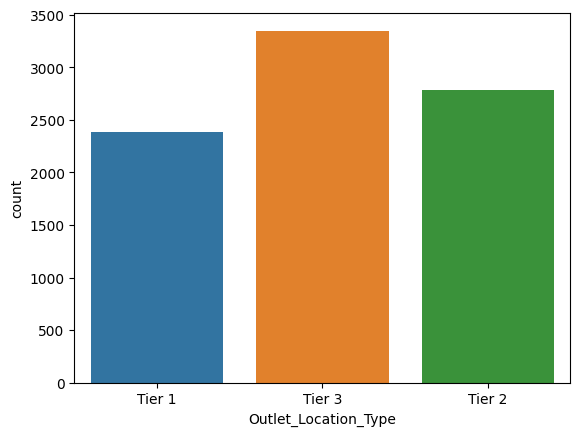

In [128]:
# Countplots to view the frequency of each class of categorial features in your dataset.
sns.countplot(x=df["Outlet_Location_Type"]);

In [129]:
print(f'When comparing the three tiers of stores Tier 3 shows the greatest variation of items available as well.')

When comparing the three tiers of stores Tier 3 shows the greatest variation of items available as well.


In [130]:
# Heatmap to view the correlation between features.
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


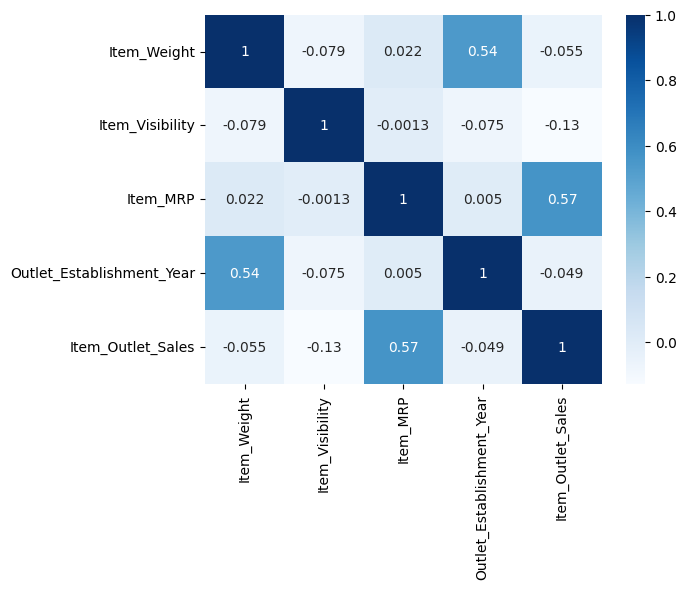

In [131]:
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [132]:
print(f'Item visibility is often considered important when making sales. The logic being the item the consumer sees more they will by more of. However the heatmap above shows a weak correlation between item visibility and item outlet sales.  ')

Item visibility is often considered important when making sales. The logic being the item the consumer sees more they will by more of. However the heatmap above shows a weak correlation between item visibility and item outlet sales.  


## **Explanatory Data Analysis**
